# Wrangle and Analyze Data

## Introduction

Real-world data rarely comes clean.
Our goal: wrangling WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. 
The Twitter archive only contains very basic tweet information. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

In [1]:
# Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

# Gather

*Gather Data 1*

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Gather data 2

# Tweet image prediction

In [5]:
# downloaded programatically the url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#To Read the TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

* Gather data 3

# Twitter API & JSON

In [7]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 708
Rate limit reached. Sleeping for: 712


In [8]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2337
The list of tweets no found 19


In [9]:
#tobe deleted
tweet_ids = list(twitter_archive['tweet_id'])

t = time.process_time()

# Store Twitter API data
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, 
                                   tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(tweet_id)
        except Exception as e:
            print(e)

elapsed_time = time.process_time()-t
print(elapsed_time)

NameError: name 'time' is not defined

In [10]:
#tobe deleted
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))


The list of tweets 2337
The list of tweets no found 19


In [11]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [12]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [13]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


# Gather: Summary¶
Gathering is the first step in the data wrangling process.

Obtaining data
Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
Importing that data into our programming environment (Jupyter Notebook)

Assessng Data

Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Twitter archive columns:

tweet_id: the unique identifier for each tweet
in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
timestamp: time when this Tweet was created
source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
text: actual UTF-8 text of the status update
retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
retweeted_status_timestamp: time of retweet
expanded_urls: tweet URL
rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
name: name of the dog
doggo: one of the 4 dog "stage"
floofer: one of the 4 dog "stage"
pupper: one of the 4 dog "stage"
puppo: one of the 4 dog "stage"

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [128]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
an              7
Daisy           7
Toby            7
Buddy           7
Bailey          7
Jax             6
Dave            6
Milo            6
Bella           6
Scout           6
Stanley         6
Jack            6
Koda            6
Oscar           6
Leo             6
Rusty           6
Sammy           5
             ... 
Yoda            1
Sailer          1
Doobert         1
Finnegus        1
Donny           1
Geno            1
Zeus            1
Stormy          1
Jett            1
Shadoe          1
Mollie          1
Chubbs          1
Murphy          1
Lizzie          1
Christoper      1
Rumble          1
Jomathan        1
Iggy            1
Billy           1
Timofy          1
Ike             1
Margo           1
Jersey          1
Ember           1
Jimbo     

In [129]:
# View number of values in the source column
twitter_archive['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [130]:
# Make sure all id's are unique, no duplicates
twitter_archive[twitter_archive.tweet_id.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [132]:
# How many dogs have a rating greater than 10
twitter_archive[twitter_archive.rating_numerator > 20].shape


(24, 17)

Observation:- Only 24 entries out of 2356 have a rating above 20.

In [17]:
# Check if there are any records in twitter_archive which are retweets
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [18]:
# Check if there are any records in arc_df whose corresponding record with same tweet_id is missing in image_prediction table
len(twitter_archive[~twitter_archive.tweet_id.isin(image_prediction.tweet_id)])

281

In [19]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [134]:
image_prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [135]:
# How many first predictions are actually dogs
image_prediction['p1_dog'].value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

In [136]:
# How many second predictions are not dogs
(image_prediction.p2_dog == False).sum()


522

In [137]:
# How many third predictions are not dogs
(image_prediction.p3_dog == False).sum()


576

In [139]:
# Find rows where p1, p2, p3 are all false (first line of code is the count)
image_prediction[(image_prediction['p1_dog']==False) & (image_prediction['p2_dog']==False) & (image_prediction['p3_dog']==False)].count()
image_prediction[(image_prediction['p1_dog']==False) & (image_prediction['p2_dog']==False) & (image_prediction['p3_dog']==False)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
1481,780931614150983680,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,1,padlock,0.731564,False,necklace,0.065462,False,chain,0.036469,False
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False
1835,837012587749474308,https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg,1,toilet_tissue,0.186387,False,cowboy_hat,0.158555,False,sombrero,0.149470,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False


There are 324 entries that not dogs (p1, p2, p3 are all false)

In [140]:
# What kind of dogs are in the first prediction?
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

There are 2075 entries and no missing values. image_predictions columns:
tweet_id: unique tweet identifier
jpg_url: image of the dog
img_num: number out of 4 possible images (most are 1)
p1: the algorithm's first prediction for the image in the tweet
p1_conf: is how confident the algorithm is in its first prediction
p1_dog: is whether or not the first prediction is a breed of dog
p2: the algorithm's second most likely prediction
p3: the algorithm's third most likely prediction

In [141]:
 # Check for tweet duplicates in image_predictions
image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37511,8182,8065738,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32241,6053,8065738,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24293,4004,8065738,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40853,8332,8065738,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39060,9032,8065738,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19627,3000,8065738,12,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11468,1984,8065738,12,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,63298,18175,8065738,12,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,26999,4118,8065738,12,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,30923,7108,8065738,12,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [143]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


There are 2342 entries and no missing values. tweet_json columns:

-tweet_id: unique tweet identifier

-retweet_count: number of retweets a tweet received

-favorite_count: number of favorites a tweets received

Programmatic assessment

Pandas functions and/or methods are used to assess the data

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
sum(twitter_archive['tweet_id'].duplicated())

0

**Tidiness Issue**:-- As part of the feedback :Change tweet_id to type int64 in order to merge with the other 2 tables

In [23]:
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype(np.int64)

In [24]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
# Sort by rating_denominator values
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [27]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [28]:
#print whole text in order to verify numerators and denominators
print(twitter_archive['text'][1120]) #17 dogs
print(twitter_archive['text'][1634]) #13 dogs
print(twitter_archive['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter_archive['text'][189]) #no picture, this will be ignored when cleaning data
print(twitter_archive['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [157]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
# Sort by rating_numerator values
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [30]:
twitter_archive.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [31]:
# Number of records whose both doggo and floofer columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')])

1

In [32]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')])

12

In [33]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None')])

1

In [34]:
# Number of records whose both floofer and pupper columns are not None
len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.pupper != 'None')])

0

In [35]:
# Number of records whose both floofer and puppo columns are not None
len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.puppo != 'None')])

0

In [36]:
# Number of records whose both pupper and puppo columns are not None
len(twitter_archive[(twitter_archive.pupper != 'None') & (twitter_archive.puppo != 'None')])

0

In [37]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [38]:
print(twitter_archive['text'][784]) #retweet - it will be deleted when delete all retweets
print(twitter_archive['text'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['text'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['text'][2335]) #actual rating 9/10 need to change manually
print(twitter_archive['text'][1663]) # tweet to explain rating
print(twitter_archive['text'][342]) #no rating - delete
print(twitter_archive['text'][516]) #no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [39]:

#Check the numerator - in the source data there seems to be fractional numerators. Are those preserved 
#when exporting the data? Take a look at the id = 681340665377193000

#TWITTER_ID NOT FOUND

twitter_archive[twitter_archive['tweet_id'] == 681340665377193000]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [41]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,Great_Pyrenees,0.157081,True
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
347,672475084225949696,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg,1,terrapin,0.879286,False,cockroach,0.045252,False,box_turtle,0.016404,False
1995,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
742,687460506001633280,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,1,Boston_bull,0.223366,True,boxer,0.183596,True,French_bulldog,0.176916,True
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True


In [42]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


(tweet image predictions) columns:

tweet_id: the unique identifier for each tweet
jpg_url: dog's image URL
img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
p1: algorithm's #1 prediction for the image in the tweet
p1_conf: how confident the algorithm is in its #1 prediction
p1_dog: whether or not the #1 prediction is a breed of dog
p2: algorithm's #2 prediction for the image in the tweet
p2_conf: how confident the algorithm is in its #2 prediction
p2_dog: whether or not the #2 prediction is a breed of dog
p3: algorithm's #3 prediction for the image in the tweet
p3_conf: how confident the algorithm is in its #3 prediction
p3_dog: whether or not the #3 prediction is a breed of dog

In [43]:
sum(image_prediction.jpg_url.duplicated())

66

In [44]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [45]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [46]:
tweet_json.retweeted_status.value_counts()

Original tweet       2171
This is a retweet     166
Name: retweeted_status, dtype: int64

In [47]:
tweet_json.source.value_counts()

Twitter for iPhone     2203
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

#### Quality Completenes, validity, consistency (content issues)

**twitter_archive**
- Keep original ratings (no retweets) that have images
- Delete columns that won't be used for analysis
- Erroneous datatypes (doggo, floofer, pupper and puppo columns), timestamp columns
- rating_denominator column has values other than 10
- rating_denominator column has values other than 10
- erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)
- some records have more than one dog stage

a. Manually (few examples assessed by individual print text).

b. Programatically (Tweets with denominator not equal to 10 are usually multiple dogs).

**image_prediction**
- Drop 66 jpg_url duplicated
- Create 1 column for image prediction and 1 column for confidence level
- Delete columns that won't be used for analysis

**tweet_json**
- Keep original tweets only

**tweet_id**
- Change tweet_id to type int64 in order to merge with the other 2 tables

**Tidiness**

- All tables should be part of one dataset
- rc_df without any duplicates (i.e. retweets) will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped
- doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"


# Cleaning Data

In [90]:

image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [60]:
archive_clean = twitter_archive.copy()


In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Quality issue 1.Define: Combine dog stage columns (doggo, floofer, pupper, puppo) into one 'dog_stage' column. Delete the
separate dog stage categories after visually inspecting a random sample to ensure the combination worked
accurately. Convert entries in this column title case.**

In [63]:
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)
# Create a new column for dog_stage
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer
+ archive_clean.pupper + archive_clean.puppo
archive_clean.dog_stage.value_counts()


                2250
doggo             96
floofer            9
doggofloofer       1
Name: dog_stage, dtype: int64

In [66]:
# Quick test to make sure dog_stage is accurate (compare to old columns)
archive_clean[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].sample(10)


,doggo,floofer,pupper,puppo,dog_stage
1595,,,,,
195,,,,,
595,,,,,
1749,,,,,
1298,,,,,
602,,,,,
896,,,,,
2201,,,,,
1004,,,,,
787,,,,,


In [68]:
# Rename values in dog_stage column
archive_clean.loc[archive_clean.dog_stage == 'pupper', 'dog_stage'] = 'Pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggo', 'dog_stage'] = 'Doggo'
archive_clean.loc[archive_clean.dog_stage == 'puppo', 'dog_stage'] = 'Puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage']= 'Doggo, Pupper'
archive_clean.loc[archive_clean.dog_stage == 'floofer', 'dog_stage'] ='Floofer'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage']= 'Doggo, Puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'Doggo, Floofer'
# Replace blank cells with NaNs
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan
# Replace NaNs with text so we have non-null values
archive_clean.dog_stage = archive_clean.dog_stage.fillna('Unknown')
archive_clean.dog_stage.value_counts()


Unknown           2250
Doggo               96
Floofer              9
Doggo, Floofer       1
Name: dog_stage, dtype: int64

In [70]:
# Drop unnecessary columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [71]:
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [49]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [72]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


1. archive_clean - keep original ratings (no retweets) that have images.

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images.

In [73]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(archive_clean.retweeted_status_user_id.value_counts()))


0


2. archive_clean - Delete columns that won't be used for analysis

In [74]:
#get the column names of twitter_archive_clean
print(list(twitter_archive_clean))

#CODE: Delete columns no needed
archive_clean = archive_clean.drop(['source',
                                             'in_reply_to_status_id',
                                             'in_reply_to_user_id',
                                             'retweeted_status_id',
                                             'retweeted_status_user_id', 
                                             'retweeted_status_timestamp', 
                                             'expanded_urls'], 1)

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dogs_stage']


In [75]:
#TEST
list(archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

3. Twitter_archive - Wrong data type of Separate timestamp 

First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.
Based on the feedback : Separate timestamp into day - month - year (3 columns)
This is not really an issue as if we convert the datatype of this column to datetime then we can extract the these values anytime.


In [78]:
#CODE: convert timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day

#Finally drop timestamp column
archive_clean = archive_clean.drop('timestamp', 1)

Separate timestamp into day - month - year (3 columns)
This is not really an issue as if we convert the datatype of this column to datetime then we can extract the these values anytime.

In [79]:
#TEST
list(archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'day']

5. Twitter_archive - Correc numerators

In [80]:
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null object
year                  342 non-null float64
month                 342 non-null float64
day                   342 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 169.9+ KB


In [81]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [127]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2170 non-null int64
text                  2170 non-null object
rating_numerator      2170 non-null float64
rating_denominator    2170 non-null float64
name                  2170 non-null object
dog_stage             2170 non-null object
year                  341 non-null float64
month                 341 non-null float64
day                   341 non-null float64
rating                2170 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 186.5+ KB


6. archive_clean - Correc denominators almost 10

a. Manually
Five tweets with denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other five tweets because they do not have actual ratings.

In [83]:
#CODE: Update both numerators and denominators
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
archive_clean = archive_clean[archive_clean['tweet_id'] != 832088576586297345]
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]
archive_clean = archive_clean[archive_clean['tweet_id'] != 682808988178739200]
archive_clean = archive_clean[archive_clean['tweet_id'] != 835246439529840640]
archive_clean = archive_clean[archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator'
                                ]])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0



b. Programatically
These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1.

In [84]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)

#TEST
archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day,rating
1467,694329668942569472,Meet Grady. He's very hungry. Too bad no one c...,9.0,10.0,Grady,Unknown,NaN,NaN,NaN,9.0
1045,743595368194129920,This is Harold. He looks slippery af. Probably...,7.0,10.0,Harold,Unknown,NaN,NaN,NaN,7.0
983,749395845976588288,This is George. He just remembered that bees a...,10.0,10.0,George,Unknown,NaN,NaN,NaN,10.0
1532,690005060500217858,"""I'm the only one that ever does anything in t...",10.0,10.0,None,Unknown,NaN,NaN,NaN,10.0
515,811386762094317568,This is Craig. That's actually a normal sized ...,11.0,10.0,Craig,Unknown,NaN,NaN,NaN,11.0


7. Image_prediction - Drop 66 jpg_url duplicated

In [91]:

#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

8. Image_prediction - Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns.

In [92]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [93]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


9. Image_prediction - Delete columns that won't be used for analysis

In [94]:
#CODE: print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

10. Tweet_json - keep 2174 original tweets

In [95]:
#CODE:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2171
Name: retweeted_status, dtype: int64

11. Tidiness - Change tweet_id to type int64 in order to merge with the other 2 tables

In [96]:
#CODE: change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#TEST
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

12. Tidiness - All tables should be part of one dataset

In [97]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 10 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null object
text                  1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1626 non-null object
dogs_stage            1626 non-null object
jpg_url               1626 non-null object
dog_type              1626 non-null object
confidence_list       1626 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 139.7+ KB


In [98]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 17 columns):
tweet_id              1626 non-null int64
timestamp             1626 non-null object
text                  1626 non-null object
rating_numerator      1626 non-null float64
rating_denominator    1626 non-null float64
name                  1626 non-null object
dogs_stage            1626 non-null object
jpg_url               1626 non-null object
dog_type              1626 non-null object
confidence_list       1626 non-null object
favorite_count        1622 non-null float64
retweet_count         1622 non-null float64
followers_count       1622 non-null float64
friends_count         1622 non-null float64
source                1622 non-null object
retweeted_status      1622 non-null object
url                   1622 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 228.7+ KB


In [199]:
df_twitter['rating_numerator'].value_counts()

12.00     404
10.00     354
11.00     342
13.00     212
9.00      133
8.00       68
7.00       31
14.00      22
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
60.00       1
144.00      1
88.00       1
84.00       1
9.75        1
0.00        1
11.26       1
165.00      1
11.27       1
121.00      1
80.00       1
Name: rating_numerator, dtype: int64

# Storing, Analyzing, and Visualizing Data

In [107]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

Insight one & visualization
Golden retriever is the most common dog in this dataset.

In [108]:
df_twitter['dog_type'].value_counts()

golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Siberian_husky                     20
Maltese_dog                        19
Cardigan                           19
Shetland_sheepdog                  19
Rottweiler                         19
beagle                             19
kuvasz                             18
basset                             17
Italian_grey

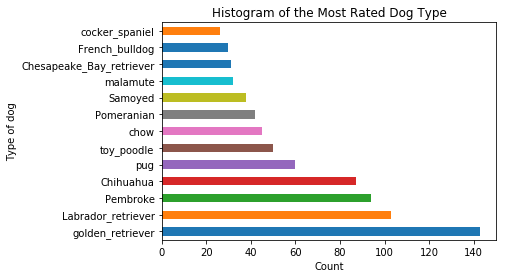

In [109]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

Insight two
Japanese_spaniel has the lowest average rating Clumber has the highest average rating

In [110]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [112]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,
Afghan_hound,809599852776681472,8.000000,10.0,11501.500000,3339.000000,8.065738e+06,12.0
Airedale,718448940360117248,9.833333,10.0,4992.583333,1291.416667,8.065746e+06,12.0
American_Staffordshire_terrier,759728394572314624,10.312500,10.0,8870.750000,2144.812500,8.065742e+06,12.0
Appenzeller,793933403993278464,11.000000,10.0,6943.500000,1345.500000,8.065741e+06,12.0
Australian_terrier,778592105778309120,11.500000,10.0,10549.500000,2870.000000,8.065741e+06,12.0


In [118]:

df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Maltese_dog                     9.315789
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
English_setter                  9.714286
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
papillon                        9.833333
Airedale                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniature_pinscher              9.916667
Ibizan_

In [114]:
print(df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'url'])

710    https://t.co/IoLRvF0Kak
Name: url, dtype: object


In [115]:
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
8,667530908589760512,2015-11-20 02:32:25 +0000,Meet Naphaniel. He doesn't necessarily enjoy h...,10.0,10.0,Naphaniel,None,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.633037,461.0,238.0,8065753.0,12.0,Twitter Web Client,Original tweet,https://t.co/xoRWyQTcmy
30,667044094246576128,2015-11-18 18:17:59 +0000,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,None,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,182.0,50.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/QZAnwgnOMB
37,667160273090932737,2015-11-19 01:59:39 +0000,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,None,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,253.0,62.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1
43,667182792070062081,2015-11-19 03:29:07 +0000,This is Timison. He just told an awful joke bu...,10.0,10.0,Timison,None,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.949892,14220.0,6173.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/s2yYuHabWl
46,667211855547486208,2015-11-19 05:24:37 +0000,This is Genevieve. She is a golden retriever c...,9.0,10.0,Genevieve,None,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,golden_retriever,0.462556,486.0,242.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/azEoGqVonH
62,668286279830867968,2015-11-22 04:33:59 +0000,Meet Rusty. Rusty's dreaming of a world where ...,11.0,10.0,Rusty,None,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,golden_retriever,0.215944,503.0,138.0,8065752.0,12.0,Twitter for iPhone,Original tweet,https://t.co/C8U6cxI1Jc
76,666345417576210432,2015-11-16 20:01:42 +0000,Look at this jokester thinking seat belt laws ...,10.0,10.0,None,None,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,282.0,131.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/VFKG1vxGjB
78,666063827256086533,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Ve...,10.0,10.0,the,None,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593,461.0,211.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/RhUEAloehK
94,666057090499244032,2015-11-16 00:55:59 +0000,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,a,None,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896,284.0,137.0,8065753.0,12.0,Twitter for iPhone,Original tweet,https://t.co/yWBqbrzy8O
110,876484053909872640,2017-06-18 16:57:37 +0000,This is Benedict. He wants to thank you for th...,13.0,10.0,Benedict,None,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,18240.0,2314.0,8065738.0,12.0,Twitter for iPhone,Original tweet,https://t.co/ccBFQU5UWO


Insight three & visualization
Dog_types with low number of ratings show a high variaty of mean ratings.

In [116]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [119]:
dog_type_count = df_dog_type_count['rating_numerator']
dog_type_mean = df_dog_type_mean['rating_numerator']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.413793
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog             

In [120]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


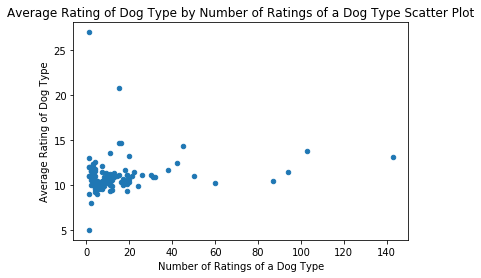

In [121]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

Insight four & visualization
The highest ratings do not receive the most retweets.

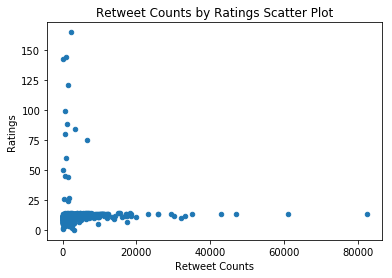

In [123]:
df_twitter.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

In [148]:
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [149]:
twitter_archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64